In [17]:
# Step function
# Sigmoid
# TanH
# ReLU
# Leaky ReLU
# Softmax

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.style.use('dark_background')

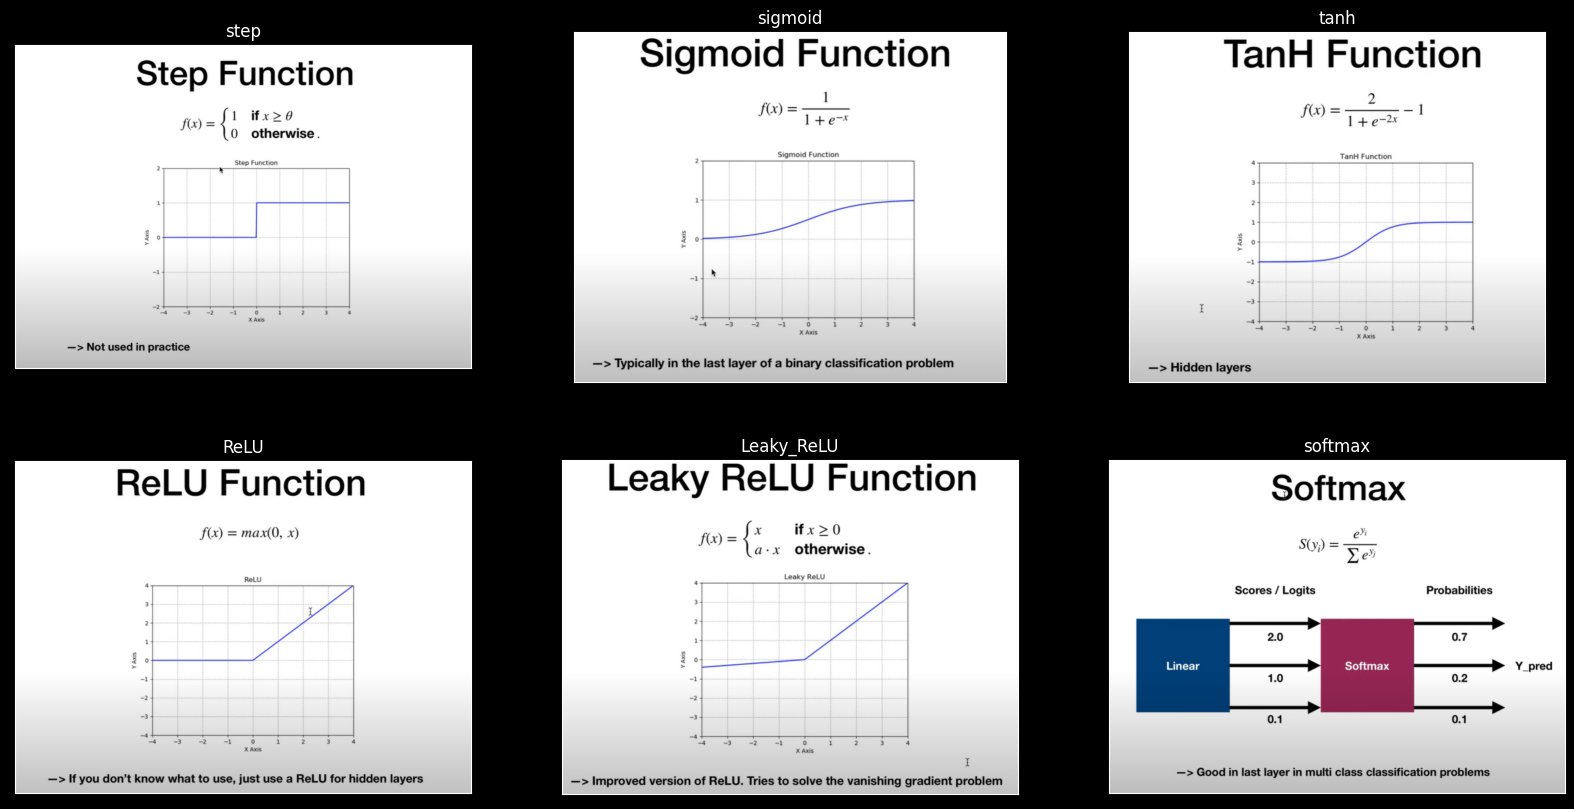

In [19]:
images_name = ['step', 'sigmoid', 'tanh', 'ReLU', 'Leaky_ReLU', 'softmax']
rows = 2
cols = 3

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 10))

# for i in range(axes.size):

for i, ax in enumerate(axes.flat):
    # add title
    if i < len(images_name):
        if i < 3:
            axes[0, i].set(title=f'{images_name[i]}')
        else:
            axes[1, i-3].set(title=f'{images_name[i]}')

    # add image
    ax.set(xticks=[], yticks=[])
    if i < len(images_name):
        image = mpimg.imread(f'images/activation_functions/{(i+1):02}_{images_name[i]}_function.jpg')
        ax.imshow(image)

plt.show()

In [20]:
# Option 1 (create nn modules)

class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet1, self).__init__()

        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        # nn.Sigmoid
        # nn.TanH
        # nn.LeakyReLU
        # nn.Softmax
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)

        return out

In [21]:
# option 2 (use activation functions directly in forward pass)
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet2, self).__init__()

        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out = torch.relu(self.linear1(x))
        out = torch.sigmoid(self.linear2(out))
        # torch.softmax
        # torch.tanh
        # F.relu = torch.relu
        # F.leaky_relu

        return out